# Recipe Site Traffic Project



## Case Explanation

Tasty Bytes is a company which is developing a search engine for recipes. The search engine helps people to find ways to to use up the limited supplies they had at home. On the homepage of the search engine, there is a recipe that is displayed each day. It is noticed that traffic to the rest of the website goes up by as much as 40% if a popular recipe is picked to display on the homepage. More traffic means more subscriptions so this is really important to the company.

The objectives of this project are:
- To predict which recipes will lead to high traffic
- To correctly predict high traffic recipes 80% of the time

The data used in this project can be found in the attached file "recipe_site_traffic_2212.csv". The data consists of several columns, which are "recipe", "calories", "carbohydrate", "sugar", "protein", "category", "servings", and "high_traffic". The details of each column are provided below.
- recipe: numeric, unique identifier of recipe
- calories: numeric, number of calories
- carbohydrate: numeric, amount of carbohydrates in grams
- sugar: numeric, amount of sugar in grams
- protein: numeric, amount of protein in grams
- category: character, type of recipe. Recipes are listed in one of ten possible groupings (Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken, 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal')
- servings: numeric, number of servings for the recipe
- high_traffic: character, if the traffic to the site was high when this recipe was shown, this is marked with “High”

## Task List

These are the steps I do for this project:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include graphics showing single variables only to demonstrate the characteristics of data  
  - Include graphics showing two or more variables to represent the relationship between features
- Model Development
  - Include reasons for selecting the models used as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare the model performance to the business
  - Describe how the models perform using this approach
- Final summary including recommendations that the business should undertake

## Data Validation

This data set has 947 rows and 8 columns. I validate all variables as follow.
- recipe: 947 unique values without missing values. No cleaning is needed.
- calories: 895 numeric non-missing values. No negative values present. The missing values are replaced by the mean of the values in the column. 
- carbohydrate: 895 numeric non-missing values. No negative value presents. The missing values are replaced by the mean of the values in the column.
- sugar: numeric 895 numeric non-missing values. No negative value presents. The missing values are replaced by the mean of the values in the column.
- protein: 895 numeric non-missing values. No negative value presents. The missing values are replaced by the mean of the values in the column.
- category: 11 unique categorical values. 'Chicken Breast' is replaced by 'Chicken' because 'Chicken Breast' does not belong to the 10 categorical values mentioned in the project description.
- servings: 6 unique values. '4 as a snack' and '6 as a snack' are replaced by 4 and 6, respectively, because they are not numeric. All values are converted to integer.
- high_traffic: 574 non-missing values. All is 'High'. The missing values are replaced by 'Not High'.

In [1]:
# Preview the summary of the data
import pandas as pd
dt = pd.read_csv('recipe_site_traffic_2212.csv')
dt.info()
dt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


In [2]:
# Validate 'recipe' column
print(dt['recipe'].nunique())

947


In [3]:
# Validate and clean 'calories', 'carbohydrate', 'sugar', 'protein' column
numeric_columns = ['calories', 'carbohydrate', 'sugar', 'protein']
print(dt[numeric_columns].describe())
for i in numeric_columns:
    dt[i].fillna(dt[i].mean(), inplace = True)
print(dt[numeric_columns].describe())

          calories  carbohydrate       sugar     protein
count   895.000000    895.000000  895.000000  895.000000
mean    435.939196     35.069676    9.046547   24.149296
std     453.020997     43.949032   14.679176   36.369739
min       0.140000      0.030000    0.010000    0.000000
25%     110.430000      8.375000    1.690000    3.195000
50%     288.550000     21.480000    4.550000   10.800000
75%     597.650000     44.965000    9.800000   30.200000
max    3633.160000    530.420000  148.750000  363.360000
          calories  carbohydrate       sugar     protein
count   947.000000    947.000000  947.000000  947.000000
mean    435.939196     35.069676    9.046547   24.149296
std     440.394131     42.724059   14.270029   35.356020
min       0.140000      0.030000    0.010000    0.000000
25%     114.410000      9.135000    1.795000    3.465000
50%     313.530000     23.170000    5.050000   12.120000
75%     576.225000     42.590000    9.285000   28.530000
max    3633.160000    530.42000

In [4]:
# Validate and clean 'category' column
print(dt['category'].nunique())
print(dt['category'].unique())
dt['category'].replace({'Chicken Breast':'Chicken'}, inplace = True)
print(dt['category'].nunique())
print(dt['category'].unique())

11
['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
10
['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken'
 'Lunch/Snacks' 'Vegetable' 'Meat' 'Dessert']


In [5]:
# Validate and clean 'servings' column
print(dt['servings'].unique())
dt['servings'].replace({'4 as a snack':'4','6 as a snack':'6'}, inplace = True)
dt['servings'] = dt['servings'].astype('int64')
print(dt['servings'].unique())

['6' '4' '1' '2' '4 as a snack' '6 as a snack']
[6 4 1 2]


In [6]:
# Validate and clean 'high_traffic' column
print(dt['high_traffic'].unique())
dt['high_traffic'].fillna('Not High', inplace = True)
print(dt['high_traffic'].unique())
dt.info()
dt

['High' nan]
['High' 'Not High']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 59.3+ KB


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.939196,35.069676,9.046547,24.149296,Pork,6,High
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,High
2,3,914.280000,42.680000,3.090000,2.880000,Breakfast,1,Not High
3,4,97.030000,30.560000,38.630000,0.020000,Beverages,4,High
4,5,27.050000,1.850000,0.800000,0.530000,Beverages,4,Not High
...,...,...,...,...,...,...,...,...
942,943,1161.000000,5.310000,22.390000,44.220000,Lunch/Snacks,2,Not High
943,944,435.939196,35.069676,9.046547,24.149296,Potato,2,High
944,945,951.740000,29.420000,3.570000,13.870000,Pork,2,High
945,946,266.610000,35.770000,0.970000,8.070000,Potato,6,High


## Explanatory Analysis

I investigate the characteristics of the variables and the relationship between them. After the analysis, I get the following insights.
- traffic, the target variable, is balance
- sugar and servings have weaker influence on traffic, compared to other variables.
- calories, carbohydrate, sugar, and protein have right-skewed distributions, hence need to be scaled if used in modeling.
- category is a categorical variable, hence needs to be converted to numeric if used in modeling.

### Target Variable - Traffic

Since we need to predict the traffic of the recipes, the traffic variable would be our target variable. From the countplot below, we can see there is no significant difference between the number of high traffic and non-high traffic entries. Therefore, the target variable is considered balance.

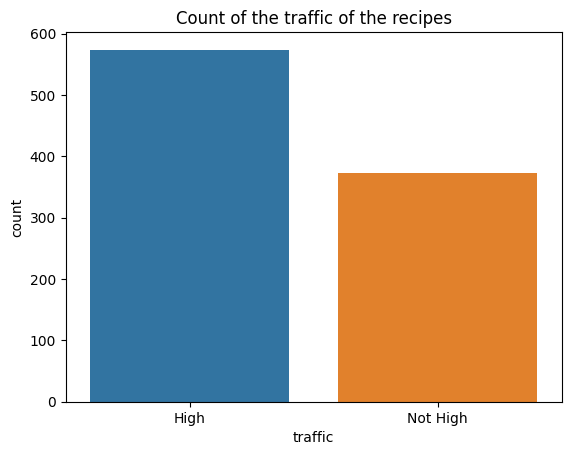

In [7]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Count of the 'high_traffic' column
sns.countplot(x = dt['high_traffic']).set(title = 'Count of the traffic of the recipes', xlabel = 'traffic');

### Numeric Variables - calories, carbohydrate, sugar, protein, servings

Histograms are used to visualize the distribution of calories, carbohydrate, sugar, and protein. From the histograms below, we can see the distribution of those variables are right-skewed. Therefore, those variables would better be scaled when used in the modeling. To visualize the distribution of servings, countplot is used because there are only 4 values for the variable. From the countplot, we can see the distribution of servings is quite similar to normal distribution, hence the variable does not have to be scaled when used in the modeling.

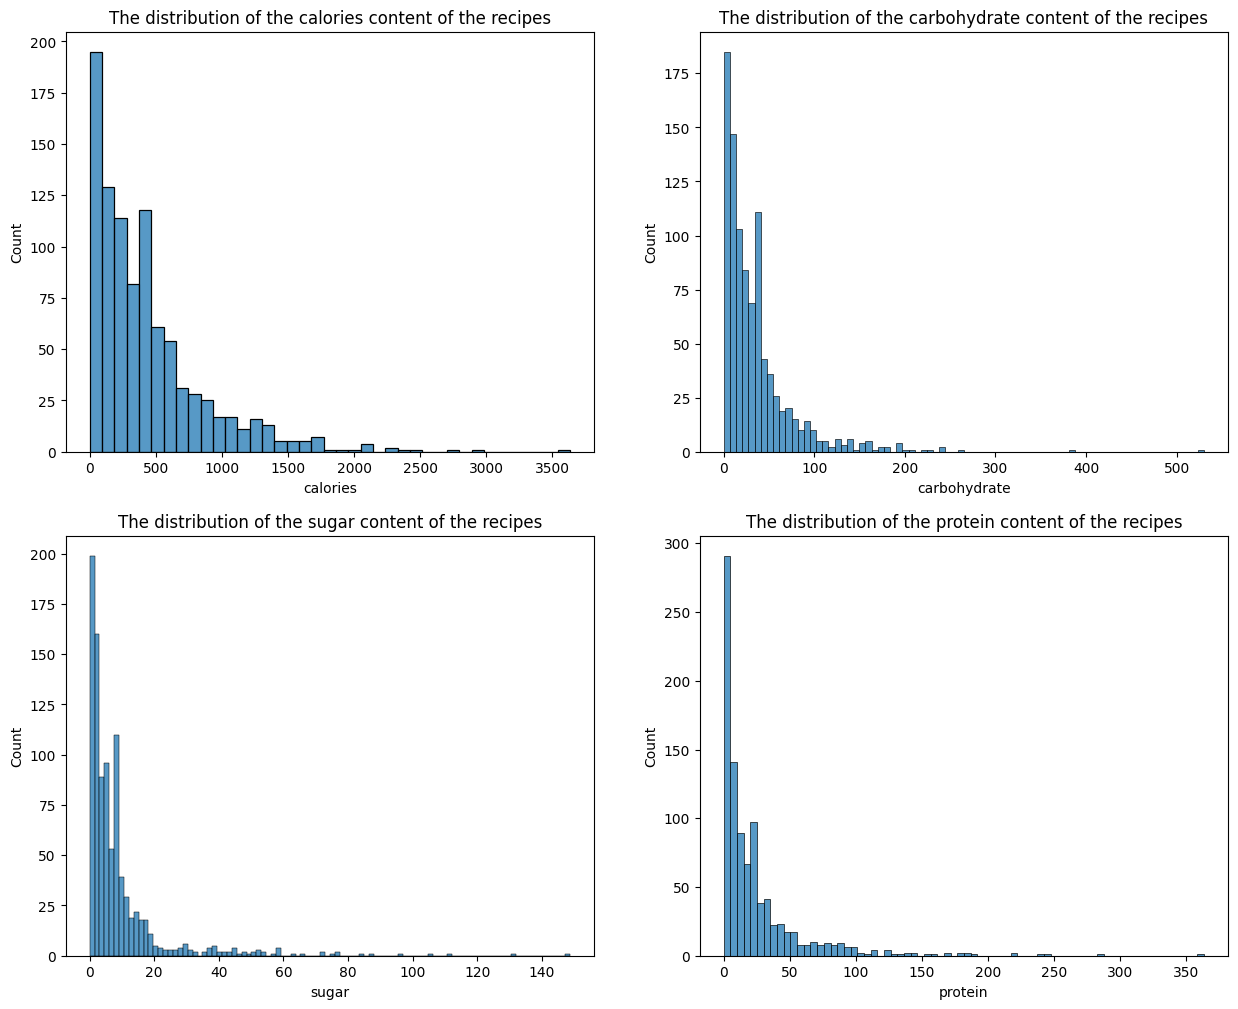

In [8]:
# The distribution of calories, carbohydrate, sugar, protein
fig, axes = plt.subplots(2, 2, figsize = (15,12))
for i in range(len(numeric_columns)):
    if i % 2 == 0:
        sns.histplot(dt[str(numeric_columns[i])], ax = axes[int(i/2),0]).set(title = 'The distribution of the ' + str(numeric_columns[i]) + ' content of the recipes')
    else:
        sns.histplot(dt[str(numeric_columns[i])], ax = axes[int((i-1)/2),1]).set(title = 'The distribution of the ' + str(numeric_columns[i]) + ' content of the recipes')

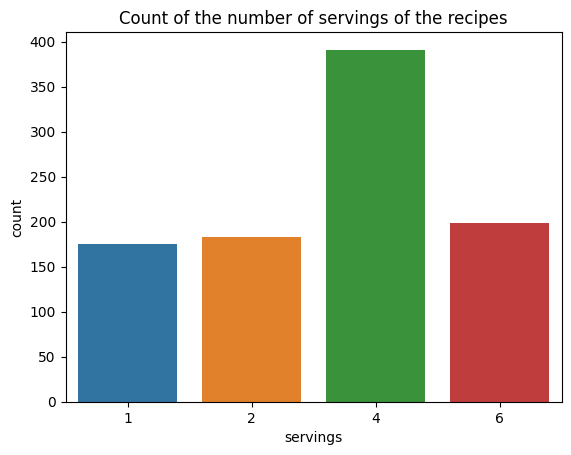

In [9]:
# The distribution of servings
sns.countplot(x = dt['servings']).set(title = 'Count of the number of servings of the recipes');

#### Relationship between calories, carbohydrate, sugar, protein, servings and traffic

To investigate the relationship between calories, carbohydrate, sugar, protein, and traffic, boxplots are used. From the boxplots below, we can see the distribution of sugar is quite similar for both high and non-high traffic. Meanwhile, the distribution of calories, carbohydrate, and protein are quite different for high and non-high traffic. It indicates sugar concentration has less influence on traffic, compared to calories, carbohydrate, and protein concentration. Moreover, stacked bar plot is used to investigate the relationship between servings and traffic. From the stacked bar plot, we can see the amount of each number of servings is always higher for high traffic than for non-high traffic. It indicates servings has little influence on traffic.

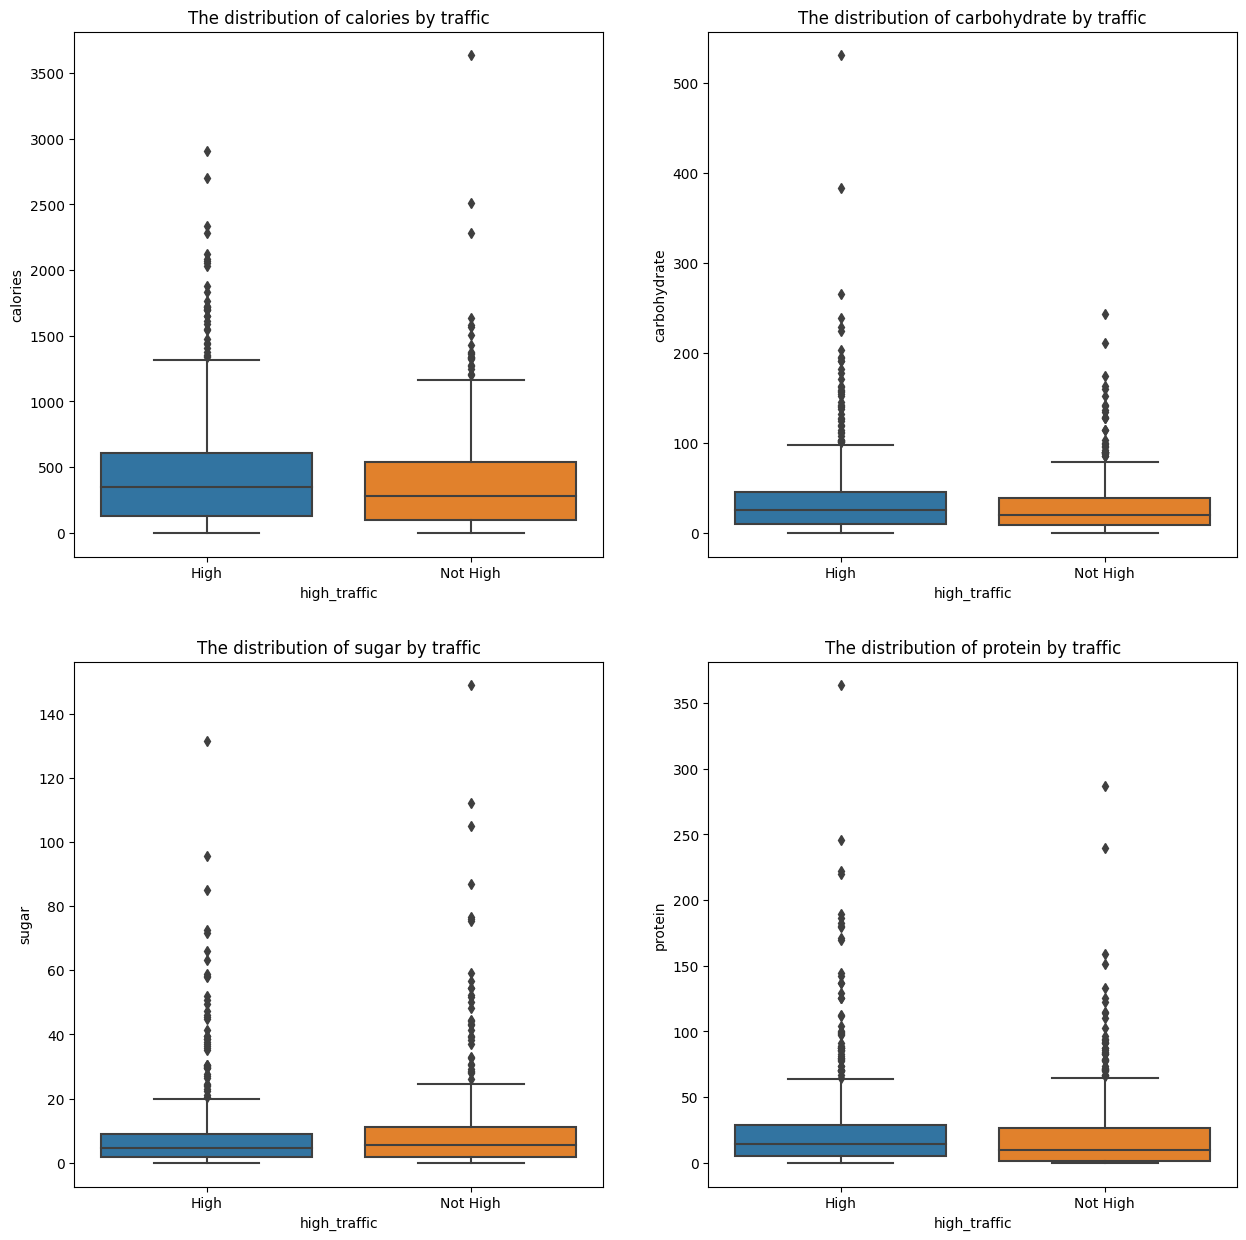

In [10]:
# Relationship between calories, carbohydrate, sugar, protein, and traffic
fig, axes = plt.subplots(2, 2, figsize = (15,15))
for i in range(len(numeric_columns)):
    if i % 2 == 0:
        sns.boxplot(data = dt, x = 'high_traffic', y = numeric_columns[i], ax = axes[int(i/2),0]).set(title = 'The distribution of ' + numeric_columns[i] + ' by traffic')
    else:
        sns.boxplot(data = dt, x = 'high_traffic', y = numeric_columns[i], ax = axes[int((i-1)/2),1]).set(title = 'The distribution of ' + numeric_columns[i] + ' by traffic')

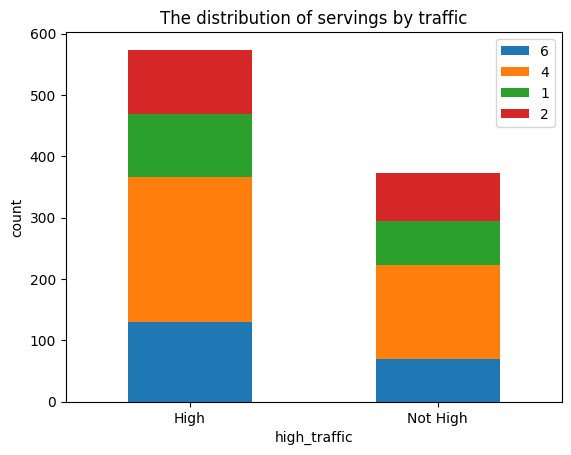

In [11]:
# Relationship between servings and traffic
def aggregate(rows, columns, data):
    column_keys = data[columns].unique()
    row_keys = data[rows].unique()
    agg = {key : [len(data[(data[rows] == value) & (data[columns] == key)]) for value in row_keys] for key in column_keys}
    agg_df = pd.DataFrame(agg, index = row_keys)
    agg_df.index.rename(rows, inplace = True)
    return agg_df

aggregate('high_traffic', 'servings', dt).plot(kind = 'bar', stacked = True)
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.title('The distribution of servings by traffic');

### Categorical Variable - category

Countplot is used to check the characteristics of category. From the countplot below, we can see chicken is the most common category of the recipes.

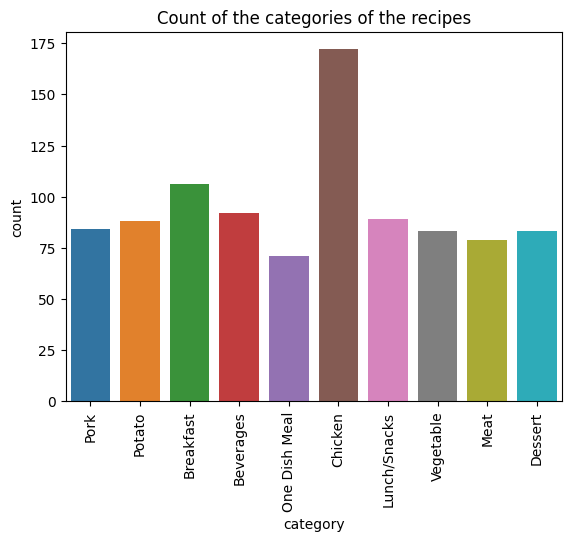

In [12]:
# Count of the 'category' column
ax = sns.countplot(x = dt['category']).set(title = 'Count of the categories of the recipes')
plt.xticks(rotation = 90);

#### Relationship between category and traffic

To investigate the relationship between category and traffic, stacked bar plot is used. From the stacked bar plot below, we can see the distribution of category is quite different between high and non-high traffic. Dessert, meat, vegetable, lunch/snacks, one dish meal, potato, and pork more likely result in high traffic. However, chicken, beverages, and breakfast more likely result in non-high traffic. It indicates category has influence on traffic.

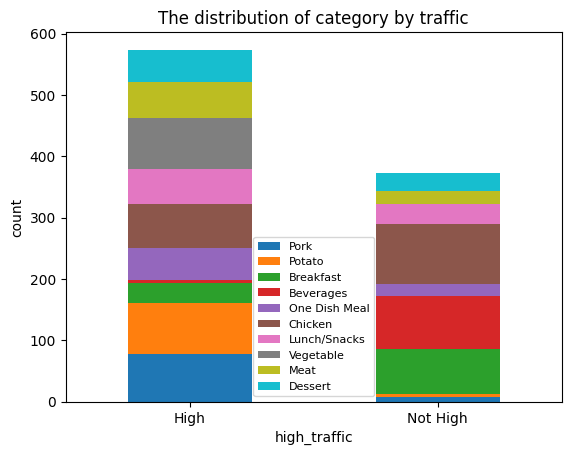

In [13]:
# Relationship between category and traffic
aggregate('high_traffic', 'category', dt).plot(kind = 'bar', stacked = True)
plt.legend(fontsize = 8)
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.title('The distribution of category by traffic');

## Model Fitting & Evaluation 

Predicting whether the traffic is high is a classification problem in machine learning. I choose the logistic regression model as the baseline model because it is a simple model commonly used to predict binary categorical target. The comparison model I choose is the random forest classifier model because it is a more flexible and powerful model used to predict binary categorical target.

For the evaluation, I choose accuracy score to evaluate the model. Accuracy score measures the percentage of predicted target value that matches actual target value.

### Prepare Data for Modeling

To enable modeling, I choose calories, carbohydrate, protein, and category as features and traffic as target variable. Sugar and servings are not selected as features because they have little influence on traffic, as explained in the explanatory analysis. furthermore, the following changes are made.
- The data is split into a training set and a testing set
- The categorical variables (category and traffic) are converted into numeric variables
- The numeric variables (calories, carbohydrate, and protein) are scaled to make their distribution similar to normal distribution

In [14]:
# Import packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

# Set features and target variable
feature_cols = ['calories','carbohydrate','protein','category']
X = dt[feature_cols] # Features
y = dt['high_traffic'] # Target variable

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

# Define the label encoder
labelencoder = LabelEncoder()
# Fit and transform data
X_train['category'] = labelencoder.fit_transform(X_train['category'])
X_test['category'] = labelencoder.transform(X_test['category'])
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)

# Define the scaler
scaler = PowerTransformer()
# Fit and transform data
X_train[['calories','carbohydrate','protein']] = scaler.fit_transform(X_train[['calories','carbohydrate','protein']])
X_test[['calories','carbohydrate','protein']] = scaler.transform(X_test[['calories','carbohydrate','protein']])

### Logistic Regression Model

Accuracy is measured for both testing and training data. The accuracy score for testing data and traning data are 0.805 and 0.732, respectively. The lower accuracy score for training data indicates that the model is underfitting. Feature importance is measured to see how big the effect each feature have on the model. From the feature importance chart below, we can see that category has the highest effect and carbohydrate has the lowest effect on logictic regression model.

In [15]:
# Import packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Build the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)

# Calculate accuracy scores
print('Logistic Regression accuracy score of test set: ', accuracy_score(y_test,y_pred))
print('Logistic Regression accuracy score of train set: ', accuracy_score(y_train,y_train_pred))

Logistic Regression accuracy score of test set:  0.8052631578947368
Logistic Regression accuracy score of train set:  0.7318361955085865


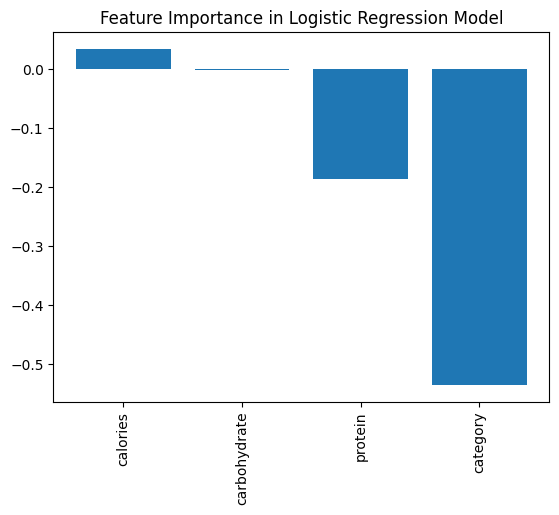

In [16]:
# Calculate feature importance
logreg_feature_imp = {}
for i in range(len(feature_cols)):
    logreg_feature_imp[feature_cols[i]] = logreg.coef_[0,i]
    
plt.bar(logreg_feature_imp.keys(),logreg_feature_imp.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Logistic Regression Model');

### Random Forest Classifier Model

The objective of the project is to make a model that can predict high traffic recipes 80% of the time. It means the model accuracy score should be at least 80%. To meet the minimal accuracy score, there are some hyperparameters in random forest classifier model that should better be set, which are 'max_depth' and 'min_samples_split'. 'max_depth' refers to the maximum depth of the tree, while 'min_samples_split' refers to the minimum number of samples required to split an internal node. To find the best hyperparameters for random forest classifier model, I do grid search cross validation using the code below. The best 'max_depth' and 'min_samples_split' are found out to be 7 and 17, respectively.

By using the best parameters for random forest classifier model, the accuracy score for testing data and traning data are 0.805 and 0.811, respectively. The accuracy score for training data is higher than the accuracy score for testing data, which indicates that the model is not underfitting. The difference between the two accuracy scores is also not too big, which indicates that the model is not overfitting. Furthermore, from the feature importance chart below, we can see that category has the highest effect and carbohydrate has the lowest effect on random forest classifier model.

In [17]:
# import packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Finding the best parameters for the model
RFC = RandomForestClassifier()
parameters = {'max_depth':[7, 9, 11], 'min_samples_split':[15, 17, 19], 'random_state':[14]}
clf = GridSearchCV(RFC, parameters)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_train)
print(clf.best_params_)
print(accuracy_score(y_pred_clf, y_train))

{'max_depth': 7, 'min_samples_split': 17, 'random_state': 14}
0.8110964332892999


In [18]:
# Build the model
RFC = RandomForestClassifier(max_depth = 7, min_samples_split = 17, random_state = 14)
RFC.fit(X_train, y_train)
y_pred_RFC = RFC.predict(X_test)
y_train_pred_RFC = RFC.predict(X_train)

# Calculate accuracy scores
print('Random Forest Classifier accuracy score of test set: ', accuracy_score(y_test,y_pred_RFC))
print('Random Forest Classifier accuracy score of train set: ', accuracy_score(y_train,y_train_pred_RFC))

Random Forest Classifier accuracy score of test set:  0.8052631578947368
Random Forest Classifier accuracy score of train set:  0.8110964332892999


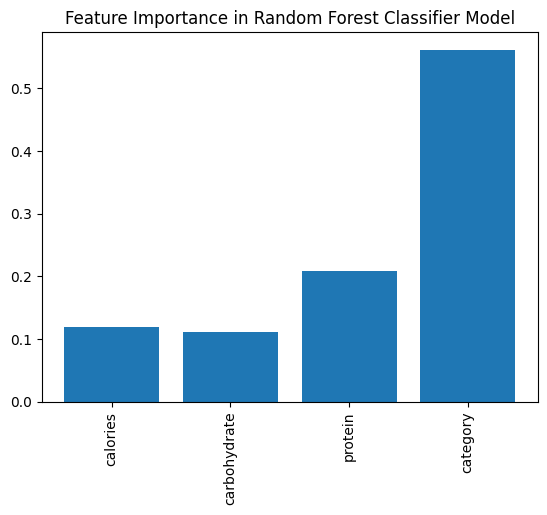

In [19]:
# Calculate feature importance
RFC_feature_imp = {}
for i in range(len(feature_cols)):
     RFC_feature_imp[feature_cols[i]] = RFC.feature_importances_[i]
        
plt.bar(RFC_feature_imp.keys(),RFC_feature_imp.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Random Forest Classifier Model');

## Results

The accuracy score of the logistic regression model is same as the accuracy score of the random forest classifier, which is 0.805. However, the logistic regression model is underfitting. Thus, the random forest classifier model is better to use for prediction.

### Evaluate by Business Criteria

The company wants to correctly predict high traffic recipes 80% of the time. Therefore, we would consider using percentage of predictions which predicted traffic is same as actual traffic as a KPI to compare the two models. That percentage is equal to accuracy score, which we have calculated previously. Both logistic regression and random forest classifier model have same accuracy score above 80%. Thus, we need to consider another factor to compare the two models. From the evaluation of the accuracy score of training and test data for each model, we conclude that logistic regression model is underfitting. It means the model capture poorly the relationship between the predictor variables and the target variable. Therefore, the random forest classifier is the best model to use to predict high traffic recipes.

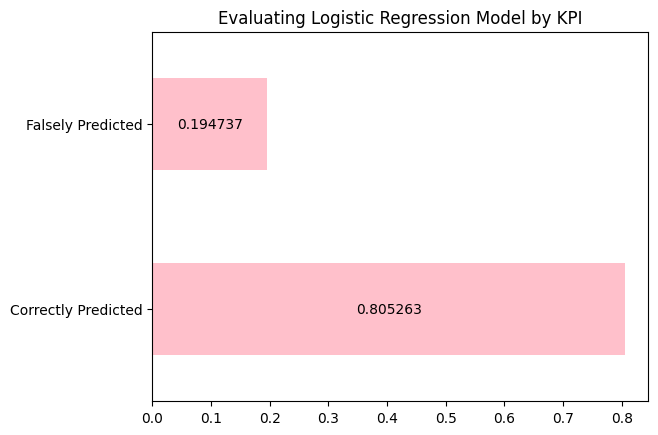

In [20]:
# Evaluating logistic regression model
logreg_e = X_test
logreg_e['Result'] =  y_test == y_pred
logreg_e['Result_traffic'] = logreg_e['Result'].apply(lambda x: 'Correctly Predicted' if x == True else 'Falsely Predicted')
ax = logreg_e['Result_traffic'].value_counts(normalize=True).plot.barh(color = 'pink')
ax.bar_label(ax.containers[0], label_type = 'center')
ax.set_title('Evaluating Logistic Regression Model by KPI');

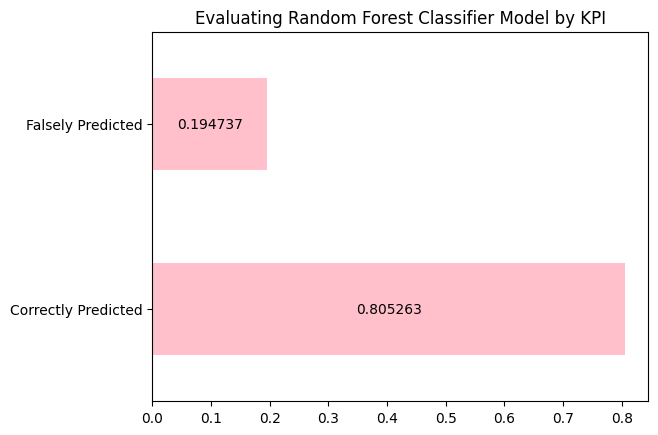

In [21]:
# Evaluating random forest classifier model
RFC_e = X_test
RFC_e['Result'] =  y_test == y_pred_RFC
RFC_e['Result_traffic'] = RFC_e['Result'].apply(lambda x: 'Correctly Predicted' if x == True else 'Falsely Predicted')
ax1 = RFC_e['Result_traffic'].value_counts(normalize=True).plot.barh(color = 'pink')
ax1.bar_label(ax1.containers[0], label_type = 'center')
ax1.set_title('Evaluating Random Forest Classifier Model by KPI');

## Recommendation 

To help the product manager better predict the high traffic recipes, we can deploy this random forest classifier model. By implementing this model, the product manager can be sure to predict high traffic recipes about 80,5% of the time. This will help the product manager build their confidence in choosing which recipes to display on the homepage each day.

To better evaluate whether this model can really help the product manager in predicting the traffic caused by the recipes, I would also recommend A/B testing to compare two methods of predicting the traffic; one uses this model, while the other does not. 

To implement and improve the model, I consider the following recommendations.
- Looking for best ways to deploy this model. The ideal way is to deploy this machine learning model on edge devices such as mobile and IoT for its convenience and security.  However, this might need some work. I will suggest deploying as web services first since it is the easiest way and test the model for the product manager.
- Collecting more data, e.g. other nutrient content of the recipes, new recipes. the more the data, the more the improvement we can make for the model.
- Feature Engineering, e.g. reducing or adding features in the model, creating more impactful features from the variables.